In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Input, Embedding, LSTM, Dense, Dot, Multiply, Flatten, Activation, Attention, Concatenate
from keras.models import Model, Sequential
from keras.layers import Layer
from sklearn.preprocessing import LabelEncoder
from keras import backend as K
from keras.callbacks import EarlyStopping

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PKL-JTK-Eben/FIX REC/movie.csv')

In [ ]:
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

In [ ]:
data['userId'] = user_encoder.fit_transform(data['userId'])
data['movieId'] = movie_encoder.fit_transform(data['movieId'])


In [ ]:
num_users = len(data['userId'].unique())
num_movies = len(data['movieId'].unique())

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
def create_sequences(data, seq_length=5):
    sequences = []
    for user_id, user_data in data.groupby('userId'):
        movie_ids = user_data['movieId'].tolist()
        for i in range(len(movie_ids) - seq_length):
            sequences.append((movie_ids[i:i+seq_length], movie_ids[i+seq_length]))
    return sequences

In [ ]:
train_sequences = create_sequences(train_data)
test_sequences = create_sequences(test_data)

In [ ]:
X_train, y_train = zip(*train_sequences)
X_test, y_test = zip(*test_sequences)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [ ]:
inputs = Input(shape=(None,))
embedding_layer = Embedding(input_dim=num_movies, output_dim=200)(inputs)
lstm_layer = LSTM(100, return_sequences=True)(embedding_layer)
attention_layer = Attention()([lstm_layer, lstm_layer])
merged_layer = Concatenate()([lstm_layer, attention_layer])
output_layer = Dense(1, activation='linear')(merged_layer)

model = Model(inputs=inputs, outputs=output_layer)

In [ ]:
# # Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)



Epoch 1/20
275/275 [==============================] - 31s 45ms/step - loss: 530223.3750 - mean_absolute_error: 583.1412 - val_loss: 472692.3750 - val_mean_absolute_error: 539.0463
Epoch 2/20
275/275 [==============================] - 10s 36ms/step - loss: 462899.7500 - mean_absolute_error: 529.7497 - val_loss: 417916.0000 - val_mean_absolute_error: 495.9218
Epoch 3/20
275/275 [==============================] - 8s 28ms/step - loss: 411733.1250 - mean_absolute_error: 490.0508 - val_loss: 372991.2500 - val_mean_absolute_error: 461.4619
Epoch 4/20
275/275 [==============================] - 10s 36ms/step - loss: 369011.2500 - mean_absolute_error: 458.2600 - val_loss: 335317.5000 - val_mean_absolute_error: 434.1328
Epoch 5/20
275/275 [==============================] - 7s 27ms/step - loss: 333009.8750 - mean_absolute_error: 432.7974 - val_loss: 303638.1875 - val_mean_absolute_error: 412.0699
Epoch 6/20
275/275 [==============================] - 10s 37ms/step - loss: 302785.7812 - mean_absolut

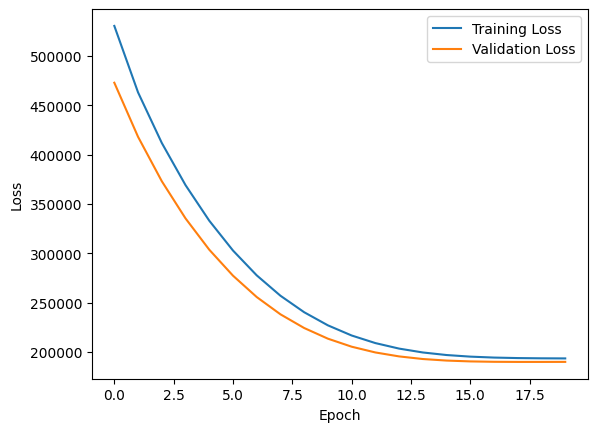

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

120/120 [==============================] - 1s 8ms/step - loss: 188062.9062 - mean_absolute_error: 355.5623
Test loss: 188062.9062, Test accuracy: 355.5623
